The blue rectangle represents the crate that we want to rotate by $90^\circ$ in order to align its long side with wall 1. The initial and final orientations are defined as $\theta_0=\pi/2$ and $\theta_f=\pi$. Wall 2 rotates about point $P$ at constant angular velocity.

![pivoting_wall.png](../memoire_makette/pivoting_wall.png)


We assume the following quantities are known:

* $m_{\mathrm{wall}_2}$: mass of wall 2
* $m$: mass of the blue crate
* $J_c$: moment of inertia of the crate about the pivot point $P$
* $a$: length of the create (long side)
* $b$: width of the crate (short side)
* $\mu$: coefficient of friction at the contact with the wall

We want to determine the input forces applied to the crate in order to rotate it while keeping the contact points as close as possible to their initial locations. To do so, we write the equations of motion of the system and later embed them into an optimization problem.

Consider a rigid rectangular plate moving in the plane, interacting with a motorised wall pivoting around a fixed point $P_w = (0,0)$. The wall imposes a prescribed orientation $\phi(t)$ (uniform rotation from 0 to $\pi/2$ in $T = 6s$), while the plate is controlled by a force applied to its centre of mass. Two points on the plate can come into contact with the wall: the lower left corner A and the upper left corner B. The contacts are modelled as opening contacts, with Coulomb friction in adhesion.

To begin with, here are the states of the system:

$$
x(t)=
\begin{bmatrix}
x_C(t)\\
y_C(t)\\
\theta(t)\\
v_x(t)\\
v_y(t)\\
\omega(t)
\end{bmatrix}
\qquad\text{with}\qquad
\omega(t)=\dot{\theta}(t)
$$

Neither the angle nor the speed of the pivoting wall are taken into account in the system state, since the angle is prescribed. The wall pivots around $P_w$ at a fixed angle $\phi(t)$ with constant angular velocity $\Omega$.
$$
  \phi(t)=\phi_0+\Omega t,
  \qquad
  \Omega=\frac{\phi_T-\phi_0}{T},
  \qquad
  P_w\in\mathbb{R}^2
  $$


The control input is a force applied to the centre of mass, bounded by a maximum norm to prevent the stack of crates from tilting (calculated before). 
$$
F(t)=
  \begin{bmatrix}
  F_x(t)\\
  F_y(t)
  \end{bmatrix},
  \qquad \|F(t)\|\le F_{\max}
  $$

We assume two contact points $P\in\{A,B\}$ between the bin and the pivoting wall. At time $t=0$, point $A$ is located at $(0,0)$ and point $B$ is located at $(0,0.4)$. Each contact is represented by a normal force $\lambda_{nP}$ and a tangential force $\lambda_{tP}$.

$$
  \lambda_A(t)=
  \begin{bmatrix}
  \lambda_{nA}(t)\\
  \lambda_{tA}(t)
  \end{bmatrix},
  \qquad
  \lambda_B(t)=
  \begin{bmatrix}
  \lambda_{nB}(t)\\
  \lambda_{tB}(t)
  \end{bmatrix}
$$

The contacts are formulated at the base and top of the wall, which pivots with $t(\phi),\,n(\phi)$ attached to the wall (at point A and B).
$$
  t(\phi)=
  \begin{bmatrix}
  -\sin\phi\\
  \cos\phi
  \end{bmatrix},
  \qquad
  n(\phi)=
  \begin{bmatrix}
  \cos\phi\\
  \sin\phi
  \end{bmatrix}
  $$

We want to add a constraint to the optimisation problem to maintain contact at points A and B. The gap $g_P(t)$ measures the signed distance from point $P$ to the right of the wall: $g_P>0$ means open contact, $g_P=0$ means closed contact.
$$
  g_A(t)=n(\phi(t))^\top\big(p_A(t)-P_w\big),
  \qquad
  g_B(t)=n(\phi(t))^\top\big(p_B(t)-P_w\big)
  $$

We must add a complementarity constraint to the previous one regarding the contact forces applied to the crate at points A and B. The contact force is the combination of the normal component and the tangential component at the base of the wall.
$$
  F_{cA}(t)=\lambda_{nA}(t)\,n(\phi(t))+\lambda_{tA}(t)\,t(\phi(t)),
  \qquad
  F_{cB}(t)=\lambda_{nB}(t)\,n(\phi(t))+\lambda_{tB}(t)\,t(\phi(t))
  $$

Moment of contact forces around the centre of mass. Each contact force generates a moment around the centre of mass via the lever arm $r_P(t)$.
$$
  \tau_A(t)=r_A(t)\times F_{cA}(t),
  \qquad
  \tau_B(t)=r_B(t)\times F_{cB}(t)
  $$

2D vector product used for the moment. In plane dynamics, the moment is a scalar given by the vector product.
$$
  r\times f \;:=\; r_x f_y - r_y f_x
  $$

Target point for corner B on the wall.
The reference $(p_{B,\mathrm{ref}}(t))$ is the point located at a distance $b$ along the tangent of the wall, which corresponds to the desired displacement of $B$ when the wall pivots.
$$
  p_{B,\mathrm{ref}}(t)=P_w + b\,t(\phi(t))
  $$


This entire problem can be translated into a problem of minimising a weighted sum of contact robotics criteria: (i) tracking the orientation of the plate relative to the wall, (ii) control effort, (iii) maintaining proximity to the wall via gaps, (iv) relaxation of contact complementarity (open contact), (v) regularisation of contact forces, (vi) tracking the operational space of corner $B$, and (vii) terminal penalties. Coefficients $q_\bullet$ are used to adjust the relative importance of each term. These equations are imposed for all $t\in[0,T]$ because they describe the continuous physics of the system: the kinematics and dynamics must be satisfied at every moment of the movement, not just at the beginning or end.

$$
\begin{aligned}
J \;=\;
&\int_{0}^{T}
\Big(
q_\theta\,(\theta(t)-\phi(t))^2
\;+\;
q_u\,\|F(t)\|^2
\Big)\,dt
\\
&+
\int_{0}^{T}
q_{\mathrm{gap}}\Big(g_A(t)^2 + g_B(t)^2\Big)\,dt
\\
&+
\int_{0}^{T}
q_{\mathrm{comp}}\Big(\lambda_{nA}(t)^2\,g_A(t)^2 + \lambda_{nB}(t)^2\,g_B(t)^2\Big)\,dt
\\
&+
\int_{0}^{T}
q_{\lambda}\Big(\|\lambda_A(t)\|^2+\|\lambda_B(t)\|^2\Big)\,dt
\\
&+
\int_{0}^{T}
q_{B}\,\big\|p_B(t)-p_{B,\mathrm{ref}}(t)\big\|^2\,dt
\\
&+
q_{T\theta}\,(\theta(T)-\phi(T))^2
\;+\;
q_{T\omega}\,\omega(T)^2 .
\end{aligned}
$$

Although the control input is the force $F(t)$, we solve the OCP using a direct transcription method. Therefore, the state trajectory $x(\cdot)$ and the contact forces $\lambda(\cdot)$ are introduced as decision variables, while the equations of motion and contact laws are enforced as constraints. This does not mean the state is directly controlled; it is optimized subject to the dynamics.

Which gives: 

$$
\begin{aligned}
\underset{
\substack{
p_C(\cdot),\,\theta(\cdot),\,v_C(\cdot),\,\omega(\cdot),\\
F(\cdot),\\
\lambda_A(\cdot),\,\lambda_B(\cdot)
}
}{\text{minimize}}
\quad
&
\int_{0}^{T}
\Big(
q_\theta\,(\theta(t)-\phi(t))^2
\;+\;
q_u\,\|F(t)\|^2
\Big)\,dt
\\
&\quad
+\int_{0}^{T}
q_{\text{gap}}\Big(g_A(t)^2 + g_B(t)^2\Big)\,dt
+\int_{0}^{T}
q_{\text{comp}}\Big(\lambda_{nA}(t)^2\,g_A(t)^2 + \lambda_{nB}(t)^2\,g_B(t)^2\Big)\,dt
\\
&\quad
+\int_{0}^{T}
q_\lambda\Big(\|\lambda_A(t)\|^2+\|\lambda_B(t)\|^2\Big)\,dt
+\int_{0}^{T}
q_B\,\big\|p_B(t)-p_{B,\text{ref}}(t)\big\|^2\,dt
\\
&\quad
+\;q_{T\theta}\,(\theta(T)-\phi(T))^2
+\;q_{T\omega}\,\omega(T)^2
\\[4pt]
\text{subject to}\quad
&
\dot p_C(t)=v_C(t),\qquad t\in[0,T]
\\
&
m\,\dot v_C(t)=F(t)+F_{cA}(t)+F_{cB}(t),\qquad t\in[0,T]
\\
&
\dot\theta(t)=\omega(t),\qquad t\in[0,T]
\\
&
I_{com}\,\dot\omega(t)=\tau_A(t)+\tau_B(t),\qquad t\in[0,T]
\\[4pt]
&
\|F(t)\|\le F_{\max},\qquad t\in[0,T]
\\[4pt]
&
g_A(t)\ge 0,\quad g_B(t)\ge 0,\qquad t\in[0,T]
\\
&
\lambda_{nA}(t)\ge 0,\quad \lambda_{nB}(t)\ge 0,\qquad t\in[0,T]
\\
&
-\mu\,\lambda_{nA}(t)\le \lambda_{tA}(t)\le \mu\,\lambda_{nA}(t),\qquad t\in[0,T]
\\
&
-\mu\,\lambda_{nB}(t)\le \lambda_{tB}(t)\le \mu\,\lambda_{nB}(t),\qquad t\in[0,T]
\\[4pt]
&
x(0)=x_0
\qquad\text{(initial conditions set)}.
\end{aligned}
$$







This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     3596
Number of nonzeros in inequality constraint Jacobian.:     2158
Number of nonzeros in Lagrangian Hessian.............:     1681

Total number of variables............................:     1446
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      720
Total number of inequality constraints...............:     1080
        inequality constraints with only lower bounds:      480
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      600

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.3936587e+05 3.09e+00 8.47e+01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

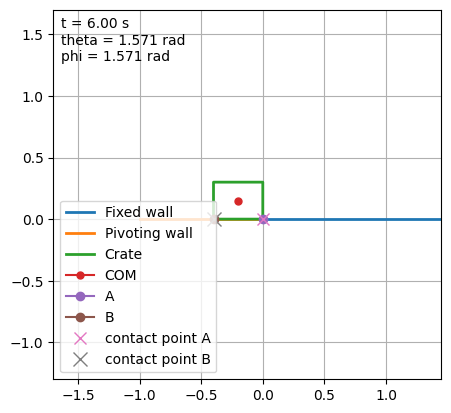

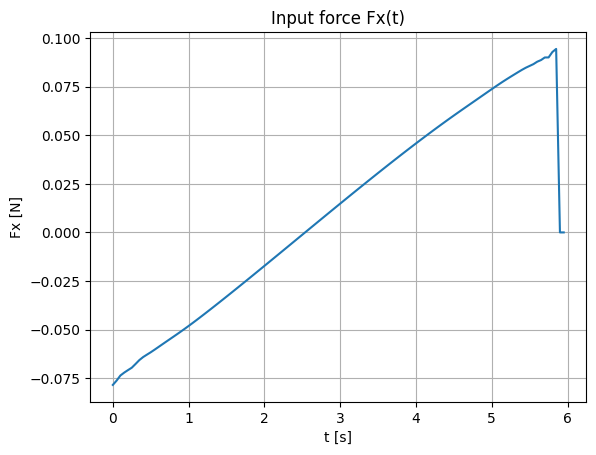

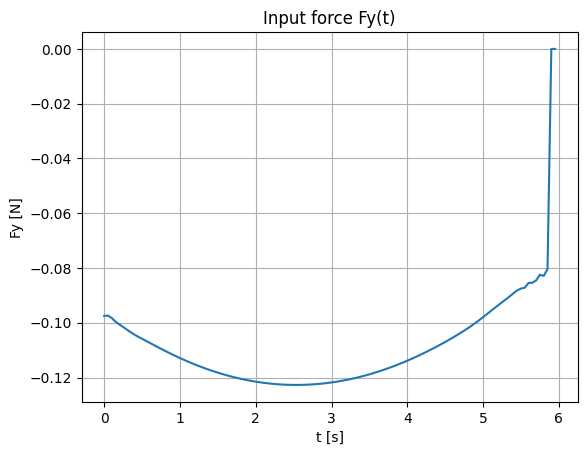

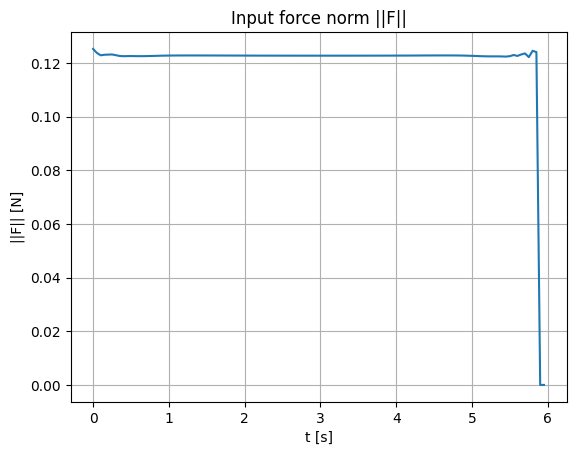

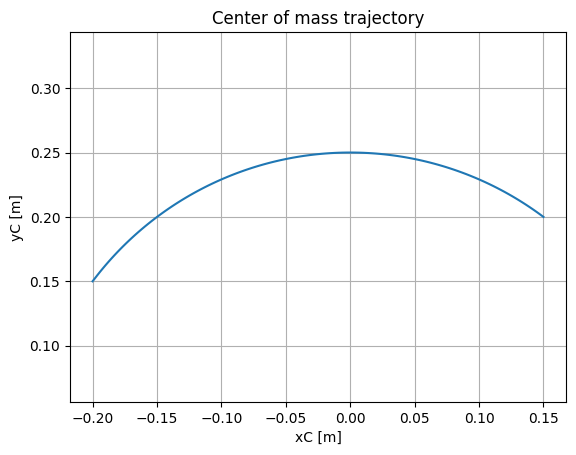

In [2]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def rot_np(angle: float) -> np.ndarray:
    c = np.cos(angle)
    s = np.sin(angle)
    return np.array([[c, -s],
                     [s,  c]], dtype=float)


def solve_ocp_two_contacts_open_with_gap_minimization():
    a = 0.300   # m
    b = 0.400   # m
    m = 7.0     # kg
    mu = 0.3
    Fmax = 40.0 # N

    T = 6.0
    dt = 0.05
    N = int(T / dt)

    # Motorized wall from 0 to +pi/2 over T
    phi0 = 0.0
    phiT = +np.pi / 2
    Omega = (phiT - phi0) / T  # constant (rad/s)

    Pw = np.array([0.0, 0.0], dtype=float) #pivot position 

    # Plate inertia from the bottom corner
    Icom = (m / 12.0) * (a*a + b*b)

    # Corners (body frame, COM -> corner)
    rA_b = np.array([-a/2.0, -b/2.0], dtype=float)  # bottom-left
    rB_b = np.array([-a/2.0, +b/2.0], dtype=float)  # top-left
    # rB_b = np.array([-a/2.0, 0.1], dtype=float) 


    # Cost weights
    q_theta = 1000.0    #Force the plate to follow the orientation of the wall (main objectif)
    q_u = 1e-1          #Reduces the magnitude of input forces
    q_du = 1e-2         #Penalises sudden variations from one time step to the next
    q_lam = 1e-2        #Take reasonable contact forces
    qT_theta = 20.0     #reach the correct final state (orientation)
    qT_omega = 20.0     #same but for v = 0 at the end
    q_gap = 1e4         #serves to draw the points towards the wall (very important)
    q_comp = 1e5        #make contact physically consistent without harsh constraints (very important)
    q_Btrack = 1e4      #geometric objective - avoid slip (very important)


    tgrid = np.linspace(0.0, T, N+1)

    opti = ca.Opti()

    # States
    xC = opti.variable(N+1)
    yC = opti.variable(N+1)
    th = opti.variable(N+1)
    vx = opti.variable(N+1)
    vy = opti.variable(N+1)
    om = opti.variable(N+1)

    # Inputs
    Fx = opti.variable(N)
    Fy = opti.variable(N)

    # Contact lambdas at A
    lam_nA = opti.variable(N)
    lam_tA = opti.variable(N)

    # Contact lambdas at B
    lam_nB = opti.variable(N)
    lam_tB = opti.variable(N)


    def Rot(angle):
        c = ca.cos(angle)
        s = ca.sin(angle)
        return ca.vertcat(
            ca.horzcat(c, -s),
            ca.horzcat(s,  c)
        )

    J = 0

    for k in range(N):
        tk = tgrid[k]
        phi_k = phi0 + Omega * tk

        # Wall basis vectors at each time step 
        tvec = ca.vertcat(-ca.sin(phi_k), ca.cos(phi_k))  # tangent
        nvec = ca.vertcat( ca.cos(phi_k), ca.sin(phi_k))  # normal

        # Plate rotation
        Rk = Rot(th[k])

        # COM
        pCk = ca.vertcat(xC[k], yC[k])
        vCk = ca.vertcat(vx[k], vy[k])

        # Point A
        rA_world = Rk @ ca.DM(rA_b)
        pAk = pCk + rA_world

        # Point B
        rB_world = Rk @ ca.DM(rB_b)
        pBk = pCk + rB_world


        # Contact A
        gA = nvec.T @ (pAk - ca.DM(Pw))
        opti.subject_to(gA >= 0)
        
        
        J += q_gap * gA**2

        opti.subject_to(lam_nA[k] >= 0)
        opti.subject_to(lam_tA[k] <=  mu * lam_nA[k])
        opti.subject_to(lam_tA[k] >= -mu * lam_nA[k])
        
        # J += q_comp * (lam_nA[k] * gA)**2
        J += q_lam * (lam_nA[k]**2 + lam_tA[k]**2)

        FcA = lam_nA[k] * nvec + lam_tA[k] * tvec
 
 
 
        # Contact B
        gB = nvec.T @ (pBk - ca.DM(Pw))
        opti.subject_to(gB >= 0)
        # J += q_gap * gB**2

        opti.subject_to(lam_nB[k] >= 0)
        opti.subject_to(lam_tB[k] <=  mu * lam_nB[k])
        opti.subject_to(lam_tB[k] >= -mu * lam_nB[k])
        # J += q_comp * (lam_nB[k] * gB)**2
        # J += q_lam * (lam_nB[k]**2 + lam_tB[k]**2)

        FcB = lam_nB[k] * nvec + lam_tB[k] * tvec

        # Positional target for B: Pw + b * t(phi)
        pB_ref = ca.DM(Pw) + b * tvec
        J += q_Btrack * ca.sumsqr(pBk - pB_ref)


        # Bounded input
        opti.subject_to(Fx[k]**2 + Fy[k]**2 <= Fmax**2)

    
        # Dynamics 
        Fc = FcA + FcB

        axk = (Fx[k] + Fc[0]) / m
        ayk = (Fy[k] + Fc[1]) / m

        opti.subject_to(xC[k+1] == xC[k] + dt * vx[k])
        opti.subject_to(yC[k+1] == yC[k] + dt * vy[k])
        opti.subject_to(vx[k+1] == vx[k] + dt * axk)
        opti.subject_to(vy[k+1] == vy[k] + dt * ayk)

        # Total torque
        tauA = rA_world[0] * FcA[1] - rA_world[1] * FcA[0]
        tauB = rB_world[0] * FcB[1] - rB_world[1] * FcB[0]
        alphak = (tauA + tauB) / Icom

        opti.subject_to(th[k+1] == th[k] + dt * om[k])
        opti.subject_to(om[k+1] == om[k] + dt * alphak)



        # Tracking and effort costs
        J += q_theta * (th[k] - phi_k)**2


        #Penalty for huge forces
        J += q_u * (Fx[k]**2 + Fy[k]**2)

        if k < N-1:
            J += q_du * ((Fx[k+1] - Fx[k])**2 + (Fy[k+1] - Fy[k])**2)

    # Terminal cost
    phi_end = phi0 + Omega * tgrid[N]
    J += qT_theta * (th[N] - phi_end)**2 + qT_omega * (om[N])**2

    opti.minimize(J)
    
    opti.set_initial(xC, a/2)
    opti.set_initial(yC, 0)
    opti.set_initial(th, 0)
    opti.set_initial(vx, 0)
    opti.set_initial(vy, 0)
    opti.set_initial(om, 0)
    opti.set_initial(lam_nA, 30.0); opti.set_initial(lam_tA, 0)
    opti.set_initial(lam_nB, 30.0); opti.set_initial(lam_tB, 0)


    Fx_guess = np.zeros(N); Fy_guess = np.zeros(N)
    Fx_guess[0] = -10.0
    Fy_guess[0] = 0.0 
    opti.set_initial(Fx, Fx_guess)
    opti.set_initial(Fy, Fy_guess)


    p_opts = {"expand": True}
    s_opts = {
        "max_iter": 8000,
        "tol": 1e-7,
        "acceptable_tol": 1e-5,
        "acceptable_iter": 50,
        "mu_strategy": "adaptive",
        "print_level": 5
    }
    opti.solver("ipopt", p_opts, s_opts)

    sol = opti.solve()

    out = {
        "t": tgrid,
        "phi": phi0 + Omega * tgrid,
        "Omega": Omega,
        "xC": sol.value(xC),
        "yC": sol.value(yC),
        "th": sol.value(th),
        "vx": sol.value(vx),
        "vy": sol.value(vy),
        "om": sol.value(om),
        "Fx": sol.value(Fx),
        "Fy": sol.value(Fy),
        "lam_nA": sol.value(lam_nA),
        "lam_tA": sol.value(lam_tA),
        "lam_nB": sol.value(lam_nB),
        "lam_tB": sol.value(lam_tB),
        "mu": mu,
        "Fmax": Fmax,
    }
    return out


def plot_out(out):
    t = out["t"]
    Fx = out["Fx"]
    Fy = out["Fy"]

    # Fx(t)
    plt.figure()
    plt.plot(t[:-1], Fx)
    plt.xlabel("t [s]")
    plt.ylabel("Fx [N]")
    plt.title("Input force Fx(t)")
    plt.grid(True)

    # Fy(t)
    plt.figure()
    plt.plot(t[:-1], Fy)
    plt.xlabel("t [s]")
    plt.ylabel("Fy [N]")
    plt.title("Input force Fy(t)")
    plt.grid(True)

    # Norm
    plt.figure()
    plt.plot(t[:-1], np.sqrt(Fx**2 + Fy**2))
    plt.xlabel("t [s]")
    plt.ylabel("||F|| [N]")
    plt.title("Input force norm ||F||")
    plt.grid(True)

    # COM trajectory
    plt.figure()
    plt.plot(out["xC"], out["yC"])
    plt.xlabel("xC [m]")
    plt.ylabel("yC [m]")
    plt.title("Center of mass trajectory")
    plt.axis("equal")
    plt.grid(True)

    plt.show()

#get the 4 corners of the parallelepiped
def corners_world(xC, yC, th, a, b):

    c, s = np.cos(th), np.sin(th)
    R = np.array([[c, -s],
                  [s,  c]])

    # corners in body frame (COM at center)
    # BL, BR, TR, TL
    corners_b = np.array([
        [-a/2, -b/2],
        [ a/2, -b/2],
        [ a/2,  b/2],
        [-a/2,  b/2]
    ])

    corners_w = (R @ corners_b.T).T + np.array([xC, yC])
    return corners_w


def animate_plate_wall(out, a=0.3, b=0.4, Pw=(0.0, 0.0),
                       wall_half_length=1.0, save_path=None, fps=20):

    t = out["t"]
    xC = out["xC"]
    yC = out["yC"]
    th = out["th"]
    phi = out["phi"]

    Pw = np.array(Pw, dtype=float)

    rA_b = np.array([-a/2, -b/2])
    rB_b = np.array([-a/2,  b/2])
    # rB_b = np.array([-a/2, 0.1])


    pA = np.zeros((len(t), 2))
    pB = np.zeros((len(t), 2))

    for k in range(len(t)):
        c, s = np.cos(th[k]), np.sin(th[k])
        R = np.array([[c, -s],
                      [s,  c]])
        pA[k] = np.array([xC[k], yC[k]]) + R @ rA_b
        pB[k] = np.array([xC[k], yC[k]]) + R @ rB_b

    # Figure
    fig, ax = plt.subplots()
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True)
    ax.plot([0.0, 5.0], [0.0, 0.0], linewidth=2, label="Fixed wall")

    # Display limits estimate
    margin = 0.3
    xmin = min(np.min(xC), np.min(pA[:, 0]), np.min(pB[:, 0]), Pw[0]) - wall_half_length - margin
    xmax = max(np.max(xC), np.max(pA[:, 0]), np.max(pB[:, 0]), Pw[0]) + wall_half_length + margin
    ymin = min(np.min(yC), np.min(pA[:, 1]), np.min(pB[:, 1]), Pw[1]) - wall_half_length - margin
    ymax = max(np.max(yC), np.max(pA[:, 1]), np.max(pB[:, 1]), Pw[1]) + wall_half_length + margin
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # Artists: wall, plate, points A/B, COM, text
    wall_line, = ax.plot([], [], linewidth=2, label="Pivoting wall")
    plate_patch, = ax.plot([], [], linewidth=2, label="Crate")
    com_point, = ax.plot([], [], marker="o", markersize=5, label="COM")
    A_point, = ax.plot([], [], marker="o", markersize=6, label="A")
    B_point, = ax.plot([], [], marker="o", markersize=6, label="B")
    Pw_point, = ax.plot([Pw[0]], [Pw[1]], marker="x", markersize=8, linestyle="None", label="contact point A")
    # Pw2 = np.array([0.0, 0.4], dtype=float)
    # Pw2_point, = ax.plot([Pw2[0]], [Pw2[1]], marker="x", markersize=8, linestyle="None",label="contact point B")
    B_contact_x, = ax.plot([], [], marker="x", markersize=10, linestyle="None", label="contact point B")

    time_text = ax.text(0.02, 0.98, "", transform=ax.transAxes, va="top")
    ax.legend(loc="lower left")

    def init():
        wall_line.set_data([], [])
        plate_patch.set_data([], [])
        com_point.set_data([], [])
        A_point.set_data([], [])
        B_point.set_data([], [])
        Pw_point.set_data([Pw[0]], [Pw[1]]) 
        # Pw2_point.set_data([], [])
        B_contact_x.set_data([], [])
        time_text.set_text("")
        return wall_line, plate_patch, com_point, A_point, B_point, Pw_point, B_contact_x, time_text

    def update(k):
        # Wall: tangent direction t(phi) = [-sin(phi), cos(phi)]
        tvec = np.array([-np.sin(phi[k]), np.cos(phi[k])])
        L = wall_half_length  # wall length (forward)
        svals = np.linspace(0.0, L, 2)
        wall_pts = Pw[None, :] + svals[:, None] * tvec[None, :]
        wall_line.set_data(wall_pts[:, 0], wall_pts[:, 1])

        # Plate: 4 corners + close polygon
        C = corners_world(xC[k], yC[k], th[k], a, b)
        poly = np.vstack([C, C[0]])
        plate_patch.set_data(poly[:, 0], poly[:, 1])

        # COM, A, B
        com_point.set_data([xC[k]], [yC[k]])
        A_point.set_data([pA[k, 0]], [pA[k, 1]])
        B_point.set_data([pB[k, 0]], [pB[k, 1]])
        B_contact_x.set_data([pB[k, 0]], [pB[k, 1]])

        time_text.set_text(
            f"t = {t[k]:.2f} s\n"
            f"theta = {th[k]:.3f} rad\n"
            f"phi = {phi[k]:.3f} rad"
        )

        return wall_line, plate_patch, com_point, A_point, B_point, B_contact_x, time_text

    interval_ms = int(1000 / fps)
    anim = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=interval_ms)

    # Save or display
    if save_path is not None:
        if save_path.lower().endswith(".gif"):
            # requires pillow
            anim.save(save_path, writer="pillow", fps=fps)
        elif save_path.lower().endswith(".mp4"):
            # requires ffmpeg installed
            anim.save(save_path, writer="ffmpeg", fps=fps)
        else:
            raise ValueError("save_path must end with .gif or .mp4")
        print(f"Animation saved: {save_path}")
    else:
        plt.show()

    return anim


if __name__ == "__main__":
    out = solve_ocp_two_contacts_open_with_gap_minimization()
    animate_plate_wall(out, save_path="rotation_plate_2contact_points.gif")
    print("max ||F|| =", np.max(np.sqrt(out["Fx"]**2 + out["Fy"]**2)), "N (<= Fmax)")
    plot_out(out)
